## NYC Taxi Trip Fare Prediction

# Problem Statement 
Using the NYC Yellow Taxi Trip dataset, the task is to analyze taxi ride records and build a predictive model that can estimate key trip attributes like trip duration or fare based on features such as pickup and drop-off times, locations, and trip distance

# Goal of the Data
The goal of the NYC Yellow Taxi Trip dataset is to analyze taxi trip data and Predict the Total Fare Amount based on trip details

Dataset link: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data?select=yellow_tripdata_2016-01.csv

| Feature Name                     | Description                                                        |
| -------------------------------- | ------------------------------------------------------------------ |
| **VendorID**                     | ID of the taxi service provider that recorded the trip             |
| **tpep_pickup_datetime**         | Date and time when the passenger was picked up                     |
| **tpep_dropoff_datetime**        | Date and time when the passenger was dropped off                   |
| **passenger_count**              | Number of passengers in the taxi                                   |
| **trip_distance**                | Distance of the trip in miles                                      |
| **pickup_longitude**             | Longitude of the pickup location                                   |
| **pickup_latitude**              | Latitude of the pickup location                                    |
| **dropoff_longitude**            | Longitude of the drop-off location                                 |
| **dropoff_latitude**             | Latitude of the drop-off location                                  |
| **RatecodeID**                   | Rate code used for the trip (e.g., standard, airport rate)         |
| **store_and_fwd_flag**           | Indicates if trip data was stored and forwarded later (`Y` or `N`) |
| **payment_type**                 | Method used for payment (	A numeric code signifying how the passenger paid for the trip.1-Credit card,2-Cash3-Nocharge,)                         |
| **fare_amount**                  | Fare charged for the trip (excluding extras)                       |
| **extra**                        | Additional charges (e.g., night or rush hour surcharge)            |
| **mta_tax**                      | Mandatory MTA tax applied to the fare                              |
| **tip_amount**                   | Tip given by the passenger                                         |
| **tolls_amount**                 | Toll charges during the trip                                       |
| **improvement_surcharge**        | Fixed surcharge added to the fare                                  |
| **total_amount**                 | Total amount paid by the passenger                                 |


# Import Libraries

In [333]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')


In [334]:
df=pd.read_csv("yellow_taxi_project.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,01-01-2016 00:00,01-01-2016 00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,2,01-01-2016 00:00,01-01-2016 00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30
2,2,01-01-2016 00:00,01-01-2016 00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30
3,2,01-01-2016 00:00,01-01-2016 00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30
4,2,01-01-2016 00:00,01-01-2016 00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,04-01-2016 17:28,04-01-2016 17:36,1,1.10,-73.956001,40.782047,1,N,-73.964256,40.767979,2,7.5,1.0,0.5,0.00,0.0,0.3,9.30
1048571,1,04-01-2016 17:28,04-01-2016 17:49,1,3.50,-73.975327,40.754677,1,N,-73.977791,40.789856,2,15.5,1.0,0.5,0.00,0.0,0.3,17.30
1048572,1,04-01-2016 17:28,04-01-2016 18:08,1,10.40,-73.781860,40.644707,1,N,-73.799858,40.588844,2,35.5,1.0,0.5,0.00,0.0,0.3,37.30
1048573,1,04-01-2016 17:28,04-01-2016 17:32,1,0.70,-73.984657,40.722603,1,N,-73.988297,40.729671,1,4.5,1.0,0.5,1.85,0.0,0.3,8.15


# Basic Understanding

In [335]:
df.shape

(1048575, 19)

In [336]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,01-01-2016 00:00,01-01-2016 00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,01-01-2016 00:00,01-01-2016 00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,01-01-2016 00:00,01-01-2016 00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,01-01-2016 00:00,01-01-2016 00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,01-01-2016 00:00,01-01-2016 00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [337]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1048570,1,04-01-2016 17:28,04-01-2016 17:36,1,1.1,-73.956001,40.782047,1,N,-73.964256,40.767979,2,7.5,1.0,0.5,0.00,0.0,0.3,9.30
1048571,1,04-01-2016 17:28,04-01-2016 17:49,1,3.5,-73.975327,40.754677,1,N,-73.977791,40.789856,2,15.5,1.0,0.5,0.00,0.0,0.3,17.30
1048572,1,04-01-2016 17:28,04-01-2016 18:08,1,10.4,-73.781860,40.644707,1,N,-73.799858,40.588844,2,35.5,1.0,0.5,0.00,0.0,0.3,37.30
1048573,1,04-01-2016 17:28,04-01-2016 17:32,1,0.7,-73.984657,40.722603,1,N,-73.988297,40.729671,1,4.5,1.0,0.5,1.85,0.0,0.3,8.15
1048574,1,04-01-2016 17:28,04-01-2016 17:35,1,2.2,-73.960930,40.760990,1,N,-73.941177,40.788143,2,8.5,1.0,0.5,0.00,0.0,0.3,10.30


In [338]:
df.sample()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
551789,1,02-01-2016 17:00,02-01-2016 17:45,2,22.3,-73.789925,40.644131,1,N,-74.01992,40.638096,1,62.5,0.0,0.5,6.0,0.0,0.3,69.3


In [343]:
df.duplicated().sum()

np.int64(0)

In [340]:
# drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [344]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048559 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048559 non-null  int64  
 1   tpep_pickup_datetime   1048559 non-null  object 
 2   tpep_dropoff_datetime  1048559 non-null  object 
 3   passenger_count        1048559 non-null  int64  
 4   trip_distance          1048559 non-null  float64
 5   pickup_longitude       1048559 non-null  float64
 6   pickup_latitude        1048559 non-null  float64
 7   RatecodeID             1048559 non-null  int64  
 8   store_and_fwd_flag     1048559 non-null  object 
 9   dropoff_longitude      1048559 non-null  float64
 10  dropoff_latitude       1048559 non-null  float64
 11  payment_type           1048559 non-null  int64  
 12  fare_amount            1048559 non-null  float64
 13  extra                  1048559 non-null  float64
 14  mta_tax                

In [284]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06,1.048559e+06
mean,1.497590e+00,1.716968e+00,1.145163e+01,-7.273234e+01,4.006743e+01,1.048822e+00,-7.279151e+01,4.010072e+01,1.440759e+00,1.273987e+01,2.138497e-01,4.970506e-01,1.527160e+00,3.177264e-01,2.997233e-01,1.559537e+01
std,4.999944e-01,1.309299e+00,7.836989e+03,9.491621e+00,5.228805e+00,4.839592e-01,9.268649e+00,5.106247e+00,5.146592e-01,1.175251e+01,2.749435e-01,4.072465e-02,2.924632e+00,1.930622e+00,1.247145e-02,1.420858e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-8.110189e+01,0.000000e+00,1.000000e+00,-7.614362e+01,0.000000e+00,1.000000e+00,-3.000000e+02,-5.000000e-01,-5.000000e-01,-3.000000e+00,-1.740000e+01,-3.000000e-01,-3.008000e+02
25%,1.000000e+00,1.000000e+00,1.050000e+00,-7.399134e+01,4.073369e+01,1.000000e+00,-7.399088e+01,4.073255e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.880000e+00
50%,1.000000e+00,1.000000e+00,1.800000e+00,-7.398140e+01,4.075236e+01,1.000000e+00,-7.397925e+01,4.075260e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01
75%,2.000000e+00,2.000000e+00,3.500000e+00,-7.396397e+01,4.076844e+01,1.000000e+00,-7.395951e+01,4.076955e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.050000e+00,0.000000e+00,3.000000e-01,1.700000e+01
max,2.000000e+00,8.000000e+00,8.000010e+06,0.000000e+00,5.726928e+01,9.900000e+01,0.000000e+00,4.823333e+01,4.000000e+00,1.463750e+03,7.000000e+00,8.900000e-01,9.981400e+02,9.235800e+02,3.000000e-01,1.463750e+03


In [345]:
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]
# Negative or zero fares/distances are unrealistic and harm prediction accuracy.


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041098 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1041098 non-null  int64  
 1   tpep_pickup_datetime   1041098 non-null  object 
 2   tpep_dropoff_datetime  1041098 non-null  object 
 3   passenger_count        1041098 non-null  int64  
 4   trip_distance          1041098 non-null  float64
 5   pickup_longitude       1041098 non-null  float64
 6   pickup_latitude        1041098 non-null  float64
 7   RatecodeID             1041098 non-null  int64  
 8   store_and_fwd_flag     1041098 non-null  object 
 9   dropoff_longitude      1041098 non-null  float64
 10  dropoff_latitude       1041098 non-null  float64
 11  payment_type           1041098 non-null  int64  
 12  fare_amount            1041098 non-null  float64
 13  extra                  1041098 non-null  float64
 14  mta_tax                

In [287]:
print("The features of the Dataset are:")
features_list = [feature for feature in df.columns]
for feature in features_list:
    print(feature)
    

The features of the Dataset are:
VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
pickup_longitude
pickup_latitude
RatecodeID
store_and_fwd_flag
dropoff_longitude
dropoff_latitude
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount


In [347]:
df.describe(include=['O'])


,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,1041098,1041098,1041098
unique,5349,5699,2
top,01-01-2016 01:12,01-01-2016 01:22,N
freq,532,561,1034756


# Visualization

In [348]:
from typing import List
def  display_col_value_counts(col_names):
    for col_name in col_names:
        print('*'*30)
        print(f"column:{col_name}")   # column name subtitle
        print('*'*30)
        print("The datatype:",df[col_name].dtypes)# the datatype of the feature
        print("The number of null values:",df[col_name].isnull().sum())
        print(df[col_name].describe()) # feature discription
        print("")
        
        # check if the unique values in the column are less than 10 to display frequently
        if df[col_name].nunique() < 10:
            print("There are",df[col_name].nunique(),"Unique values")
            print("The frequency Table")
            print(df[col_name].value_counts())
        else:
            print("Frequency table not displayed, there are ",df[col_name].nunique(),"Unique values")
        print("")
        
display_col_value_counts(df.columns)

******************************
column:VendorID
******************************
The datatype: int64
The number of null values: 0
count    1.041098e+06
mean     1.498351e+00
std      4.999975e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: VendorID, dtype: float64

There are 2 Unique values
The frequency Table
VendorID
1    522266
2    518832
Name: count, dtype: int64

******************************
column:tpep_pickup_datetime
******************************
The datatype: object
The number of null values: 0
count              1041098
unique                5349
top       01-01-2016 01:12
freq                   532
Name: tpep_pickup_datetime, dtype: object

Frequency table not displayed, there are  5349 Unique values

******************************
column:tpep_dropoff_datetime
******************************
The datatype: object
The number of null values: 0
count              1041098
unique                5699
top       0

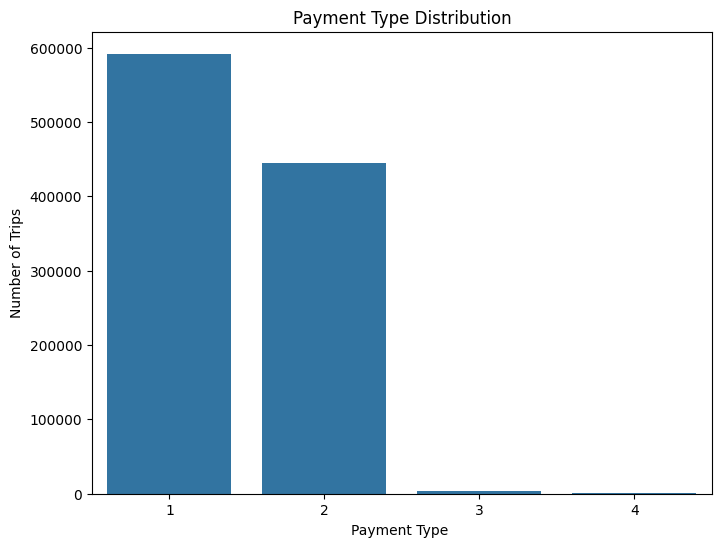

In [290]:
plt.figure(figsize=(8,6))
sns.countplot(x='payment_type', data=df)
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type ')
plt.ylabel('Number of Trips')
plt.show()

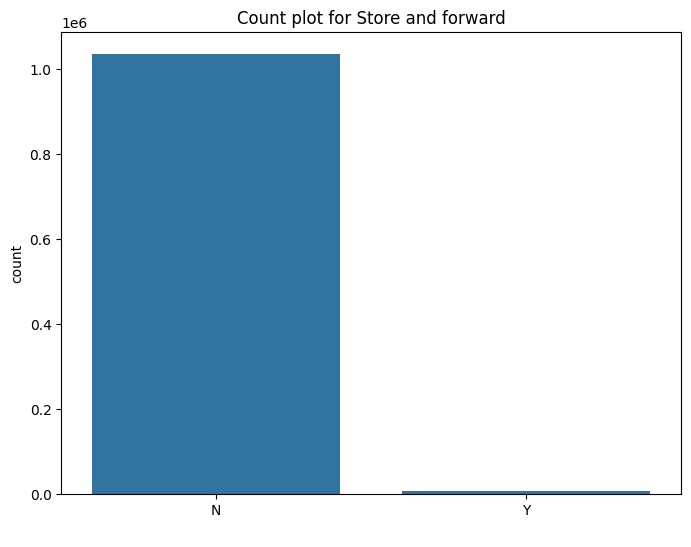

In [291]:
plt.figure(figsize=(8,6))
sns.countplot(x='store_and_fwd_flag', data=df)
plt.title('Count plot for Store and forward')
plt.xlabel(' ')
plt.ylabel('count')
plt.show()

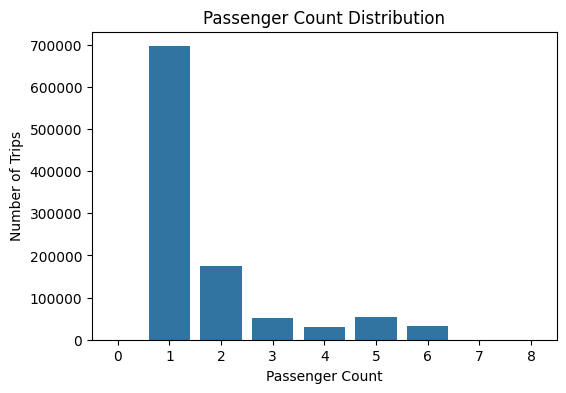

In [292]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['passenger_count'])
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()


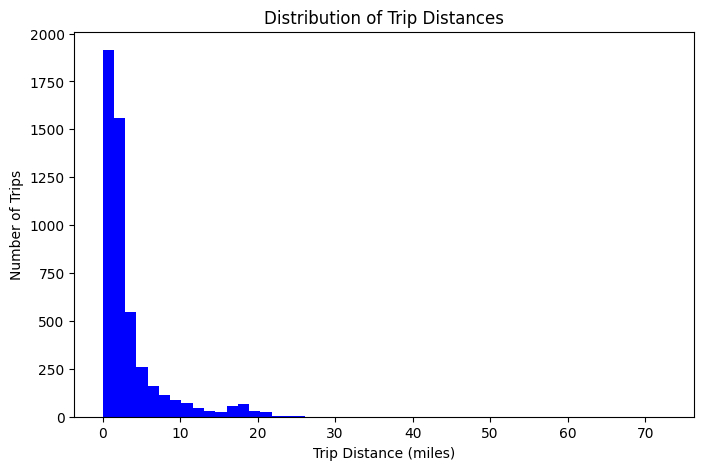

In [293]:
sample_df = df.sample(5000, random_state=42) 
plt.figure(figsize=(8,5))
plt.hist(sample_df['trip_distance'], bins=50, color='blue')
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trip Distances")
plt.show()

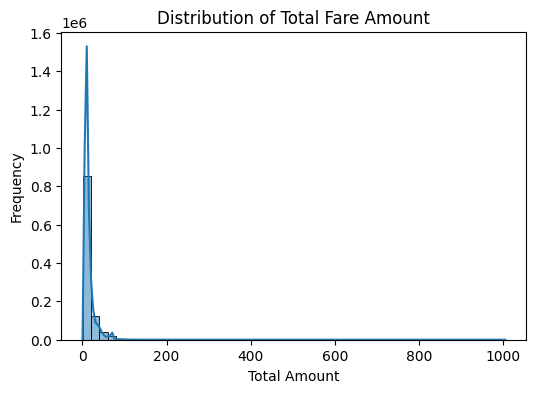

In [294]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribution of Total Fare Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()


In [295]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(
#     x=df['trip_distance'],
#     y=df['total_amount'],
#     alpha=0.3
# )
# plt.title("Trip Distance vs Total Fare")
# plt.xlabel("Trip Distance (miles)")
# plt.ylabel("Total Amount")
# plt.show()


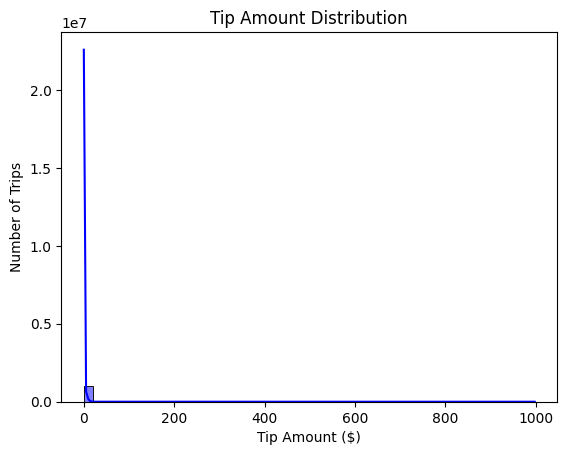

In [296]:
sns.histplot(df['tip_amount'], bins=50, color='blue', kde=True)
plt.title("Tip Amount Distribution")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Number of Trips")
plt.show()

Inferences:
* Most taxi trips have 1–2 passengers
* Fare increases with trip distance ,Relationship is approximately linear
* Card and cash payments dominate
* Weekdays show higher taxi usage
* Longer trips generally cost more
* Fare amount is right-skewed. Majority of trips are low to medium cost
* Most passengers give little or no tip, and only a few give higher tips
* Most taxi rides are short, with only a small number of long-distance trips.

In [297]:
# select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# keep only continuous features (remove ID-like columns)
continuous_cols = [col for col in numeric_cols if df[col].nunique() > 10]
continuous_cols


['trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount']

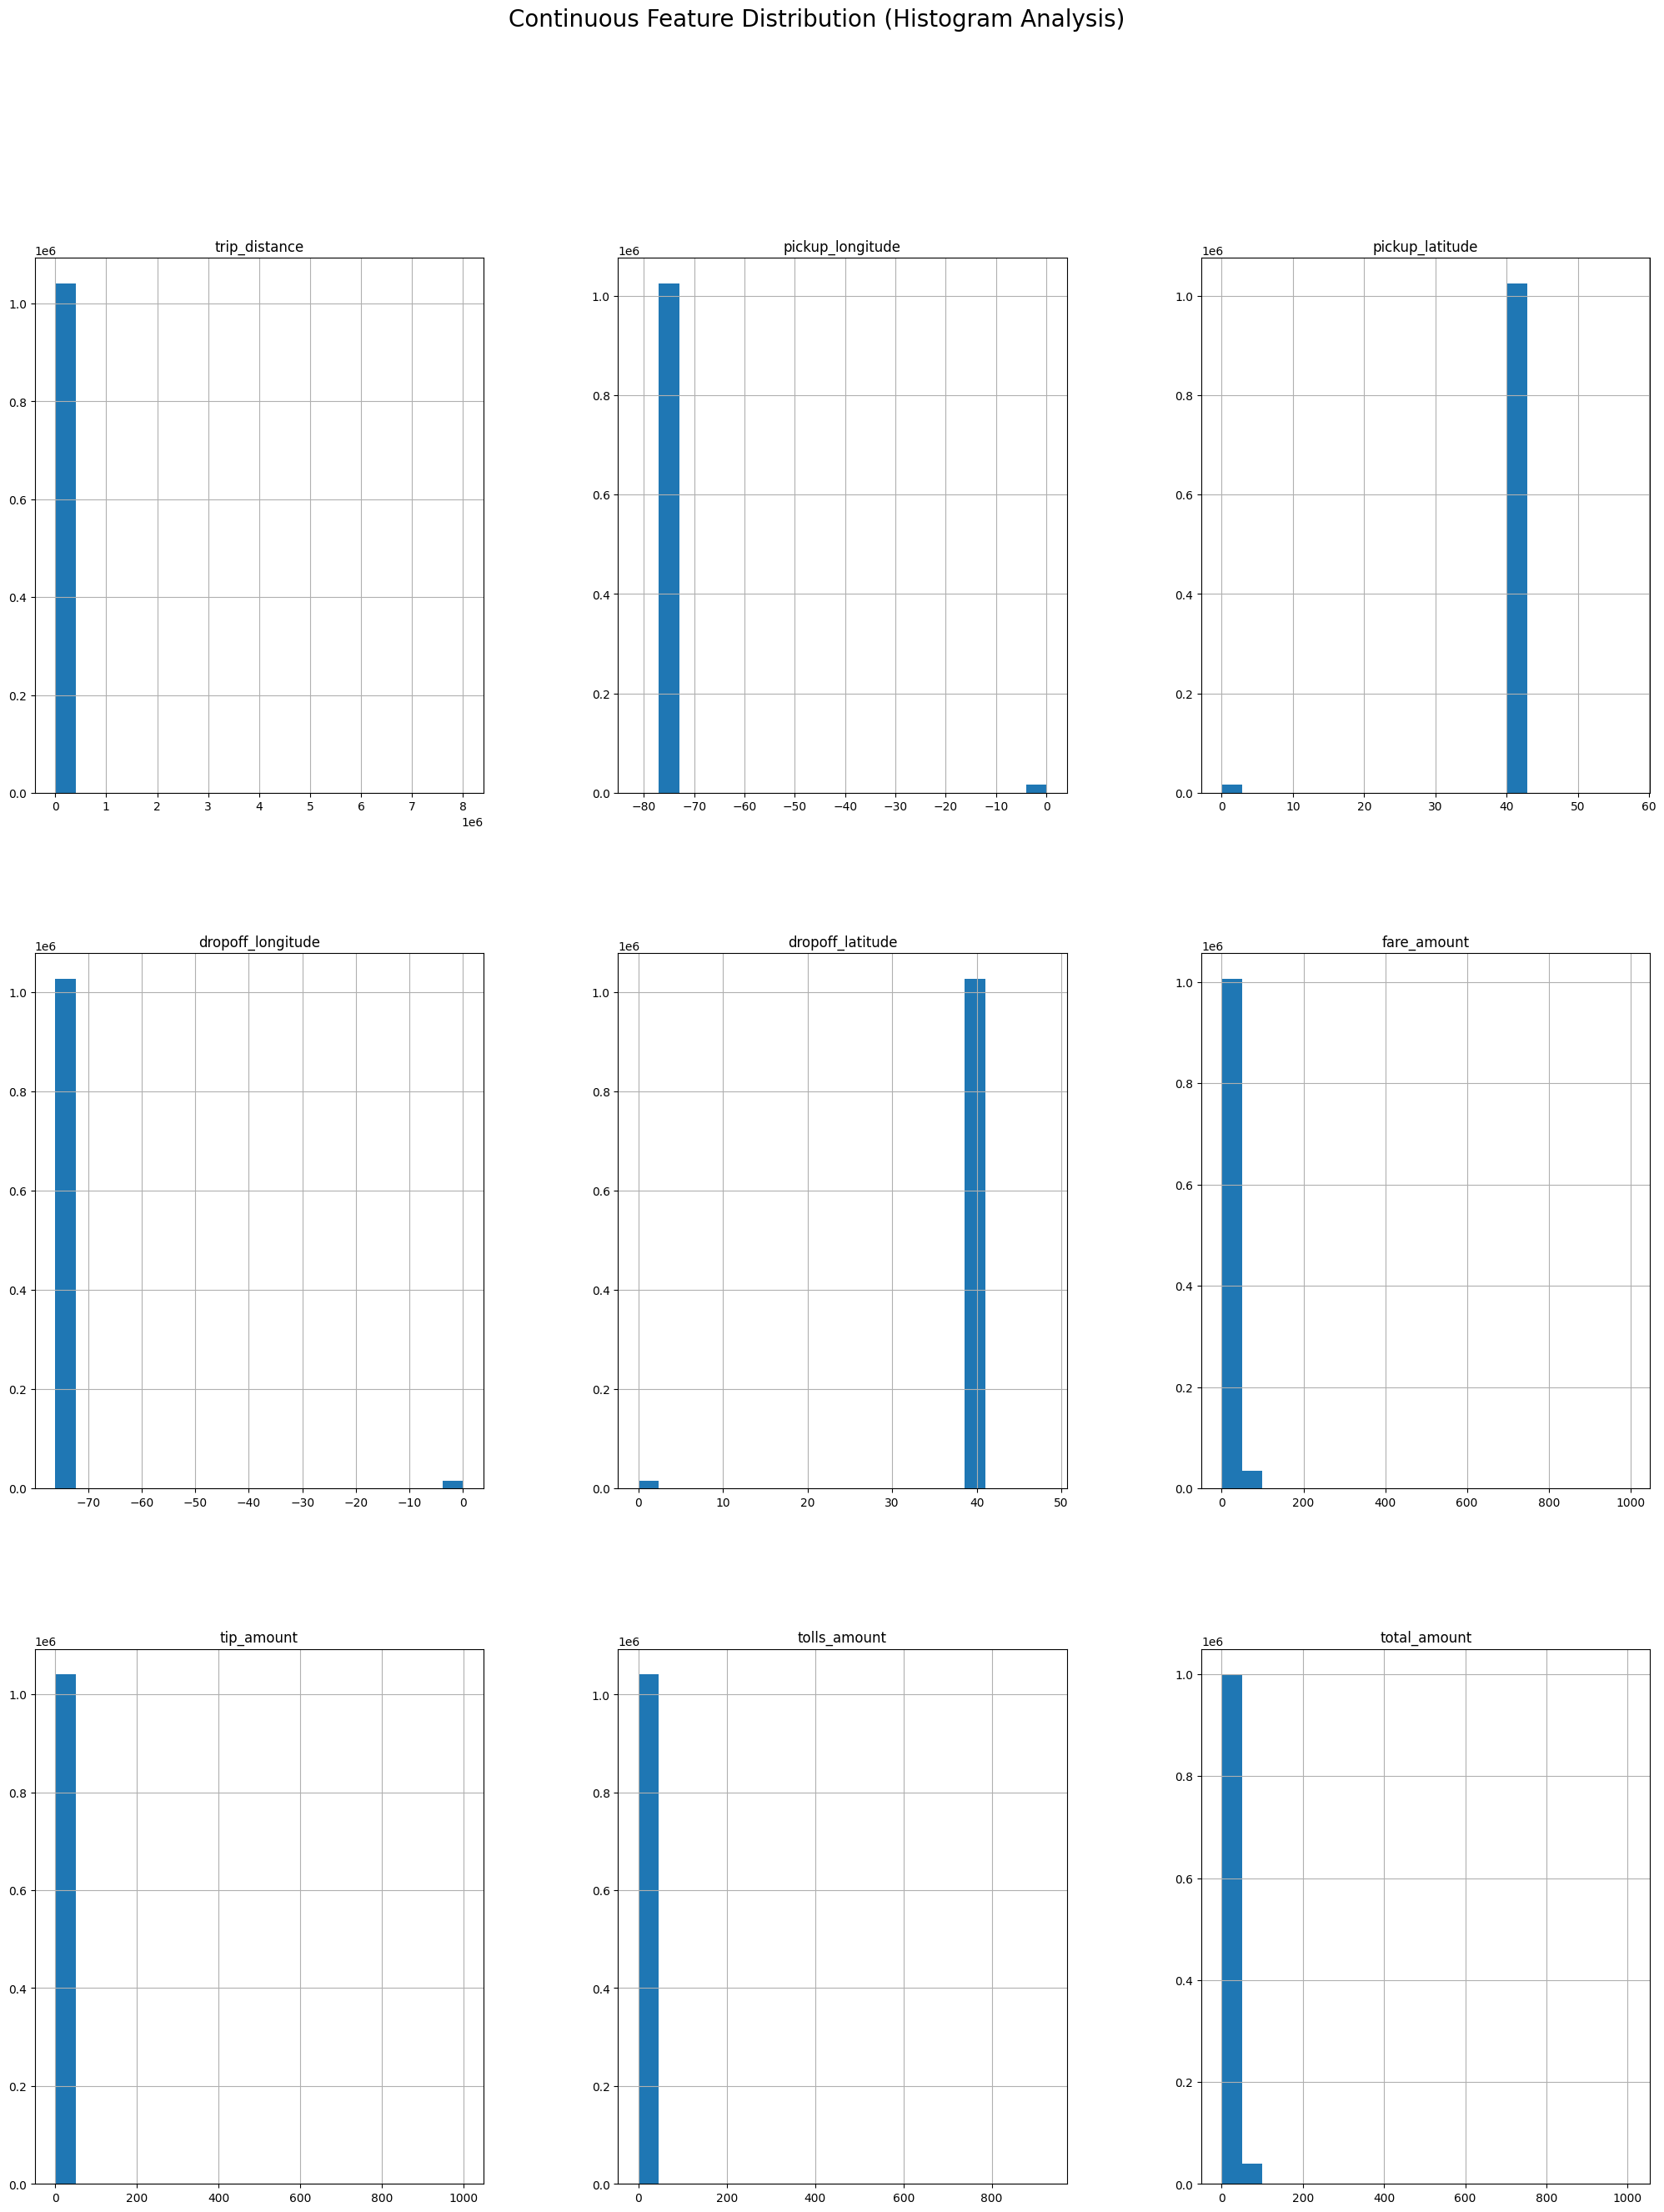

In [298]:

df[continuous_cols].hist(bins=20, figsize=(25, 30))
plt.suptitle('Continuous Feature Distribution (Histogram Analysis)', fontsize=20)
plt.show()


In [299]:
# calculate skewness for each column
skewness = df[continuous_cols].skew()
# sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values 
print(sorted_skewness)

dropoff_latitude       -8.228759
pickup_latitude        -7.781621
fare_amount             4.592686
total_amount            4.989669
pickup_longitude        7.781992
dropoff_longitude       8.229636
tip_amount             64.162035
tolls_amount          201.949474
trip_distance        1011.334576
dtype: float64


In [300]:
skewed_cols = [
    'trip_distance',
    'fare_amount',
    'tip_amount',
    'tolls_amount',
    # 'pickup_longitude',
    # 'dropoff_longitude'
]

for col in skewed_cols:
    df[col] = np.log1p(df[col])

In [301]:
# calculate skewness for each column
skewness = df[continuous_cols].skew()
# sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values 
print(sorted_skewness)


dropoff_latitude    -8.228759
pickup_latitude     -7.781621
tip_amount           0.708059
fare_amount          0.891638
trip_distance        1.057707
tolls_amount         4.171056
total_amount         4.989669
pickup_longitude     7.781992
dropoff_longitude    8.229636
dtype: float64


In [302]:
df.isnull().sum()


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

<Axes: >

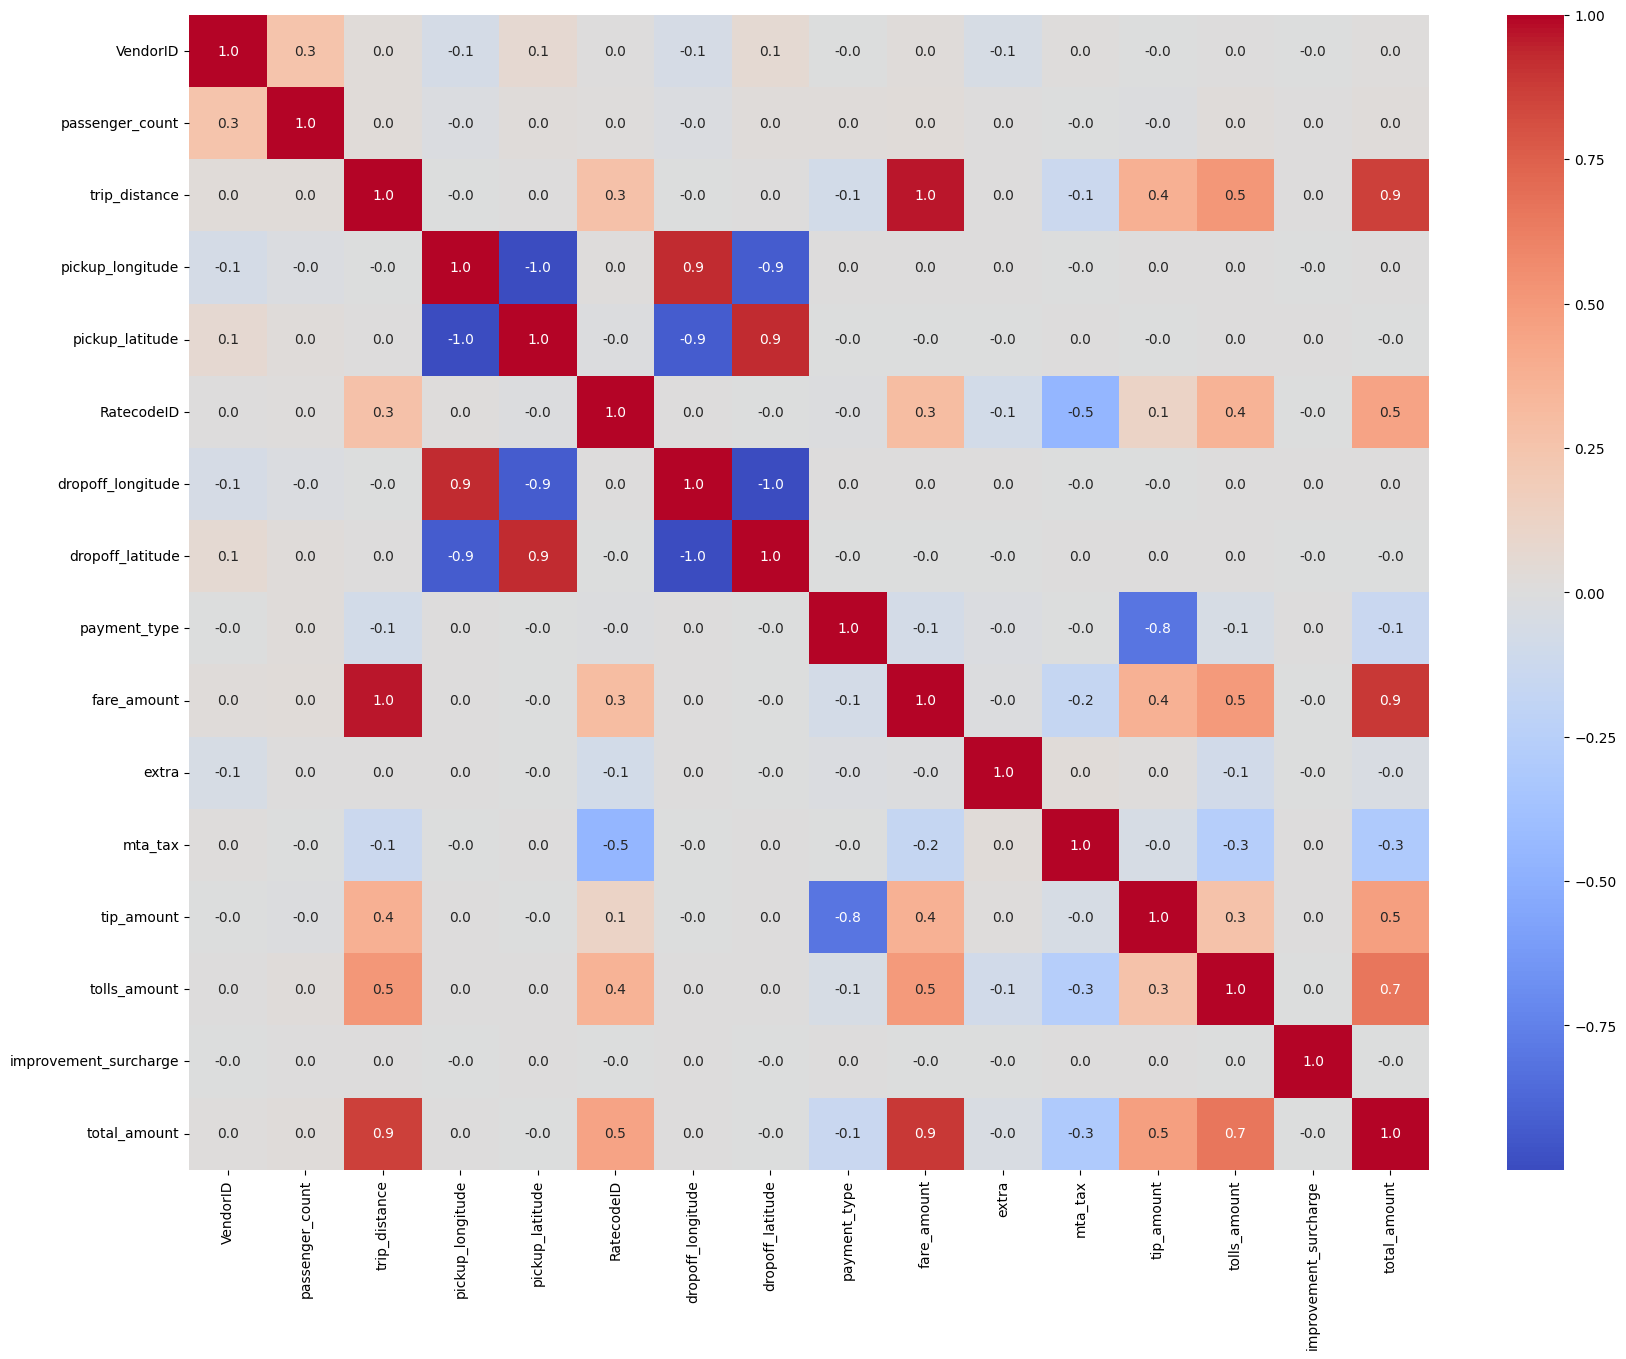

In [303]:
plt.figure(figsize=(20,15))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.01f')

Inference:
* Trip distance is the most important predictor
* Location features strongly influence pricing
* Time features have smaller impact
* Fare-related components are strongly interlinked
* No multicollinearity issue for most independent variables

In [304]:
correlation_matrix = df.corr(numeric_only=True)
threshold= 0.5 # set the correlation threshold

# find pairs of features with high correlation 
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
            
# print all pairs of highly correlated features 
print(highly_correlated_pairs)

[('pickup_latitude', 'pickup_longitude'), ('dropoff_longitude', 'pickup_longitude'), ('dropoff_longitude', 'pickup_latitude'), ('dropoff_latitude', 'pickup_longitude'), ('dropoff_latitude', 'pickup_latitude'), ('dropoff_latitude', 'dropoff_longitude'), ('fare_amount', 'trip_distance'), ('tip_amount', 'payment_type'), ('tolls_amount', 'trip_distance'), ('total_amount', 'trip_distance'), ('total_amount', 'fare_amount'), ('total_amount', 'tolls_amount')]


In [305]:
corr_target = df.corr(numeric_only=True)['total_amount'].sort_values(ascending=False)

high_corr = corr_target[abs(corr_target) > 0.5]
high_corr

total_amount     1.000000
fare_amount      0.884455
trip_distance    0.865460
tolls_amount     0.663100
Name: total_amount, dtype: float64

In [306]:
# step1: calculate the correlation of each feature with target 
corr_with_target = df.corr(numeric_only=True)['total_amount'].sort_values(ascending=False)

# step2: set the threshold for low correlation (-0.05 to 0.05)
low_corr_features = corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# step 3:Print the list of features with low correlation
print("Features with correlation between -0.05 and 0.05:")
print(low_corr_features)

Features with correlation between -0.05 and 0.05:
passenger_count          0.021673
VendorID                 0.011484
pickup_longitude         0.003648
dropoff_longitude        0.002470
improvement_surcharge   -0.001577
dropoff_latitude        -0.002585
pickup_latitude         -0.003211
extra                   -0.031731
Name: total_amount, dtype: float64


In [307]:
# Below features are very less correlated  with the target variable:

df.drop(columns=[
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'pickup_longitude',
                 'VendorID'
                 ],inplace=True)

In [308]:
df.drop(columns=[
    'fare_amount',
    'RatecodeID',
    'extra',
    'improvement_surcharge',
    'passenger_count',
    'tolls_amount',
    'mta_tax',
    ]
    ,inplace=True)

# Outlier Handling

Boxplot

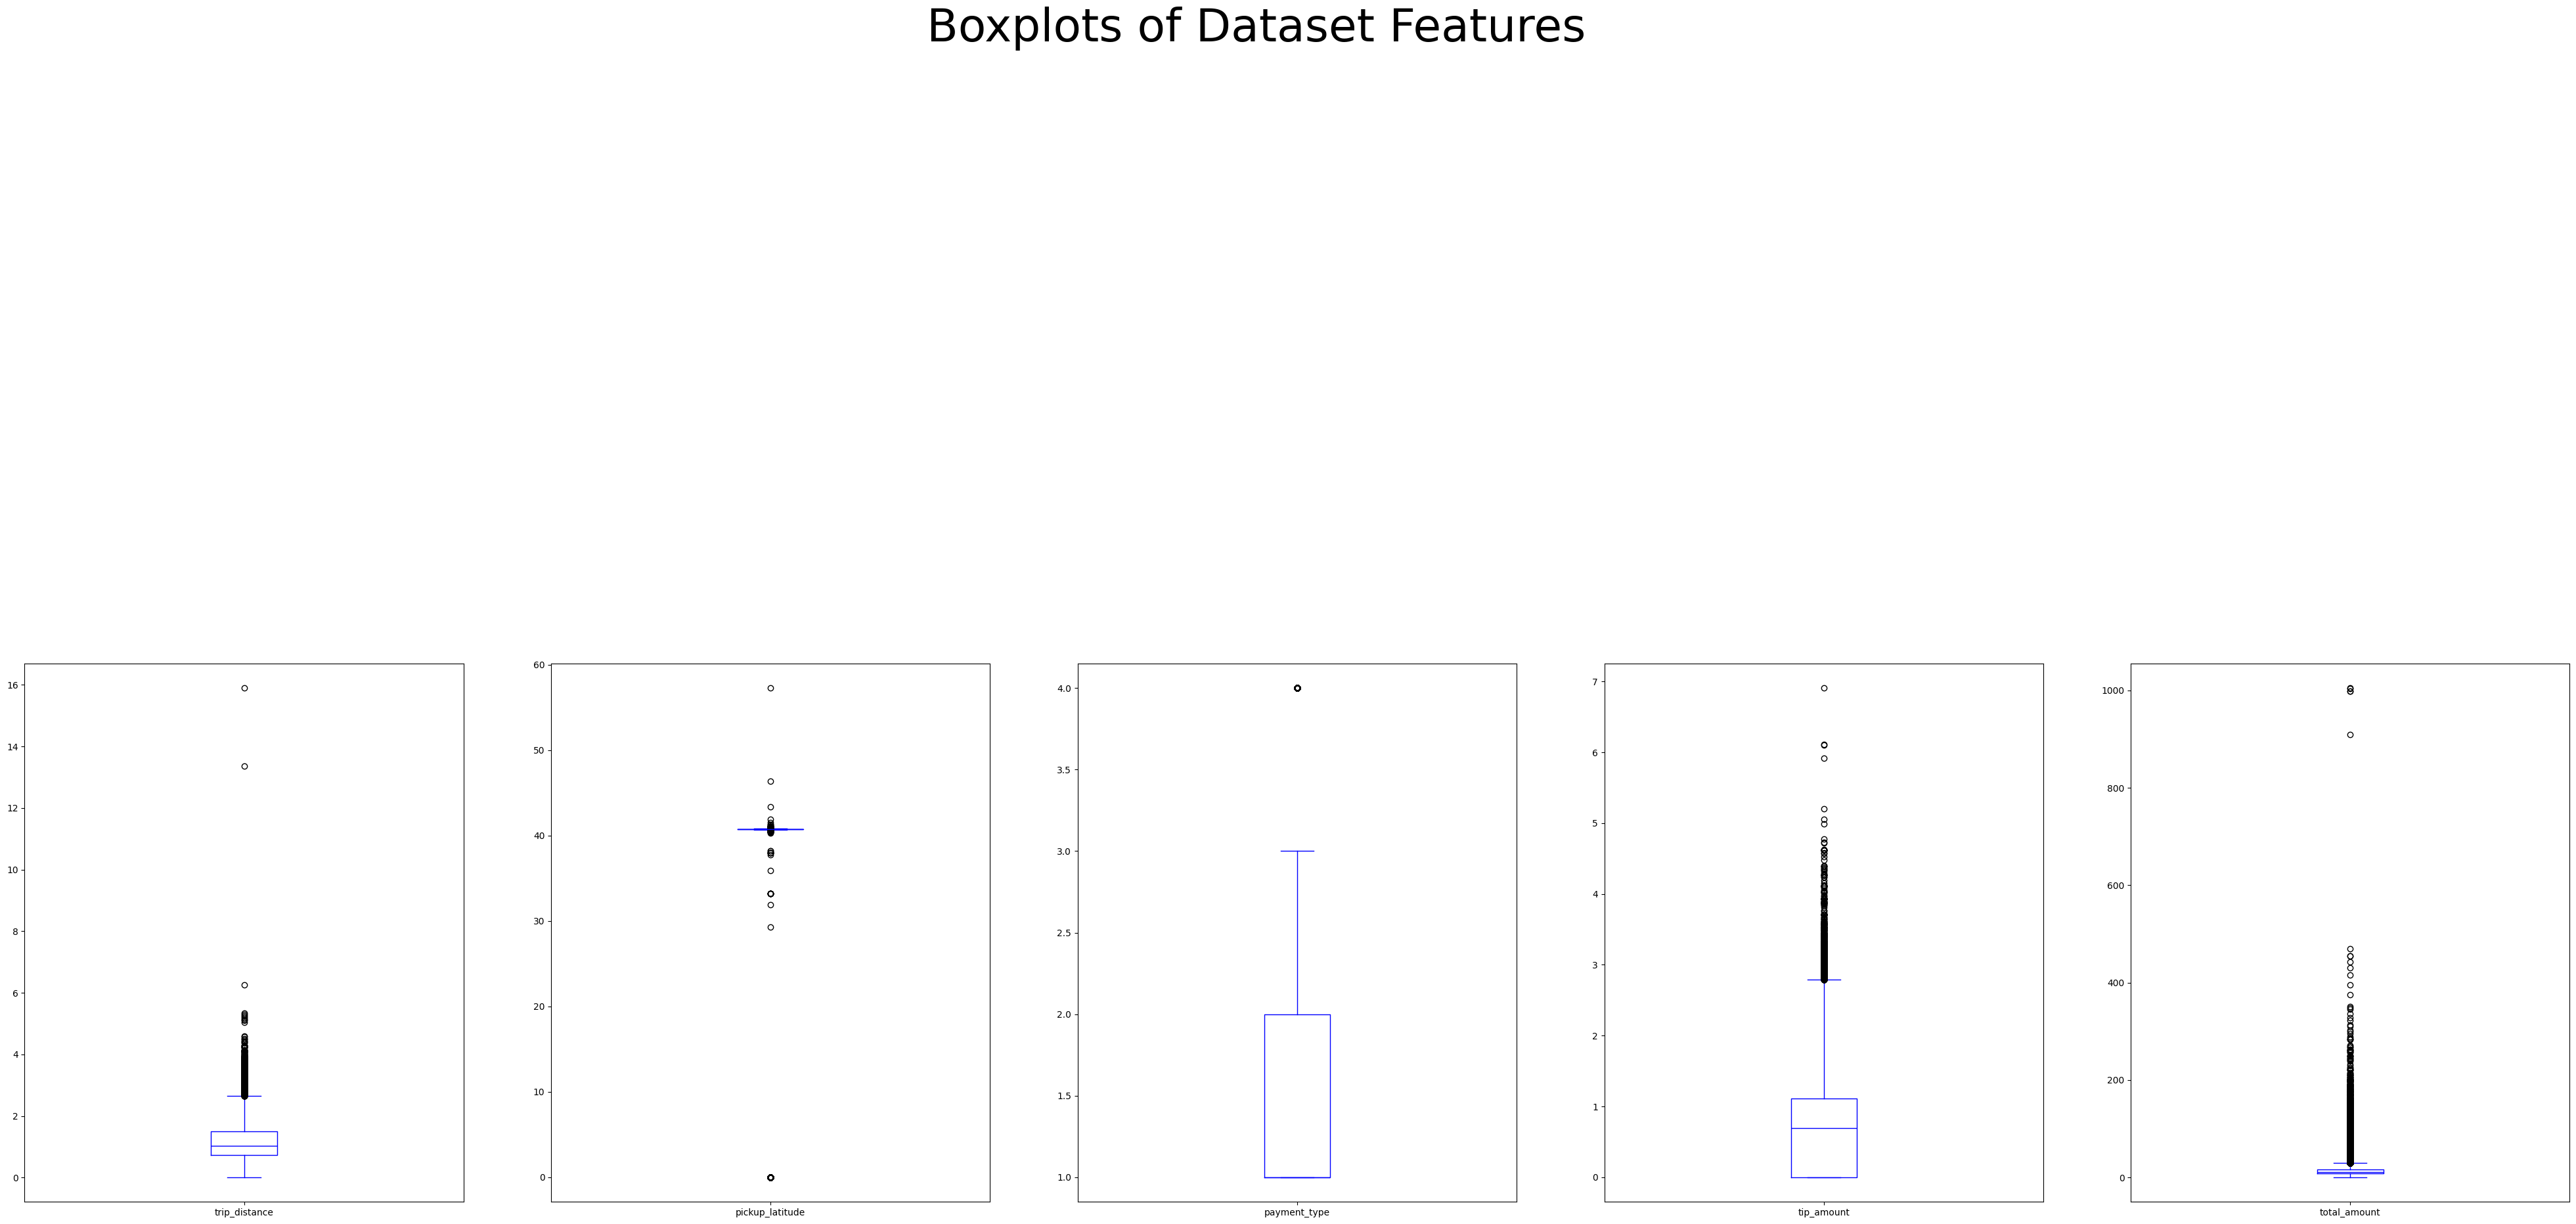

In [309]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='b')
plt.suptitle('Boxplots of Dataset Features',fontsize=50)
plt.show()

In [310]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

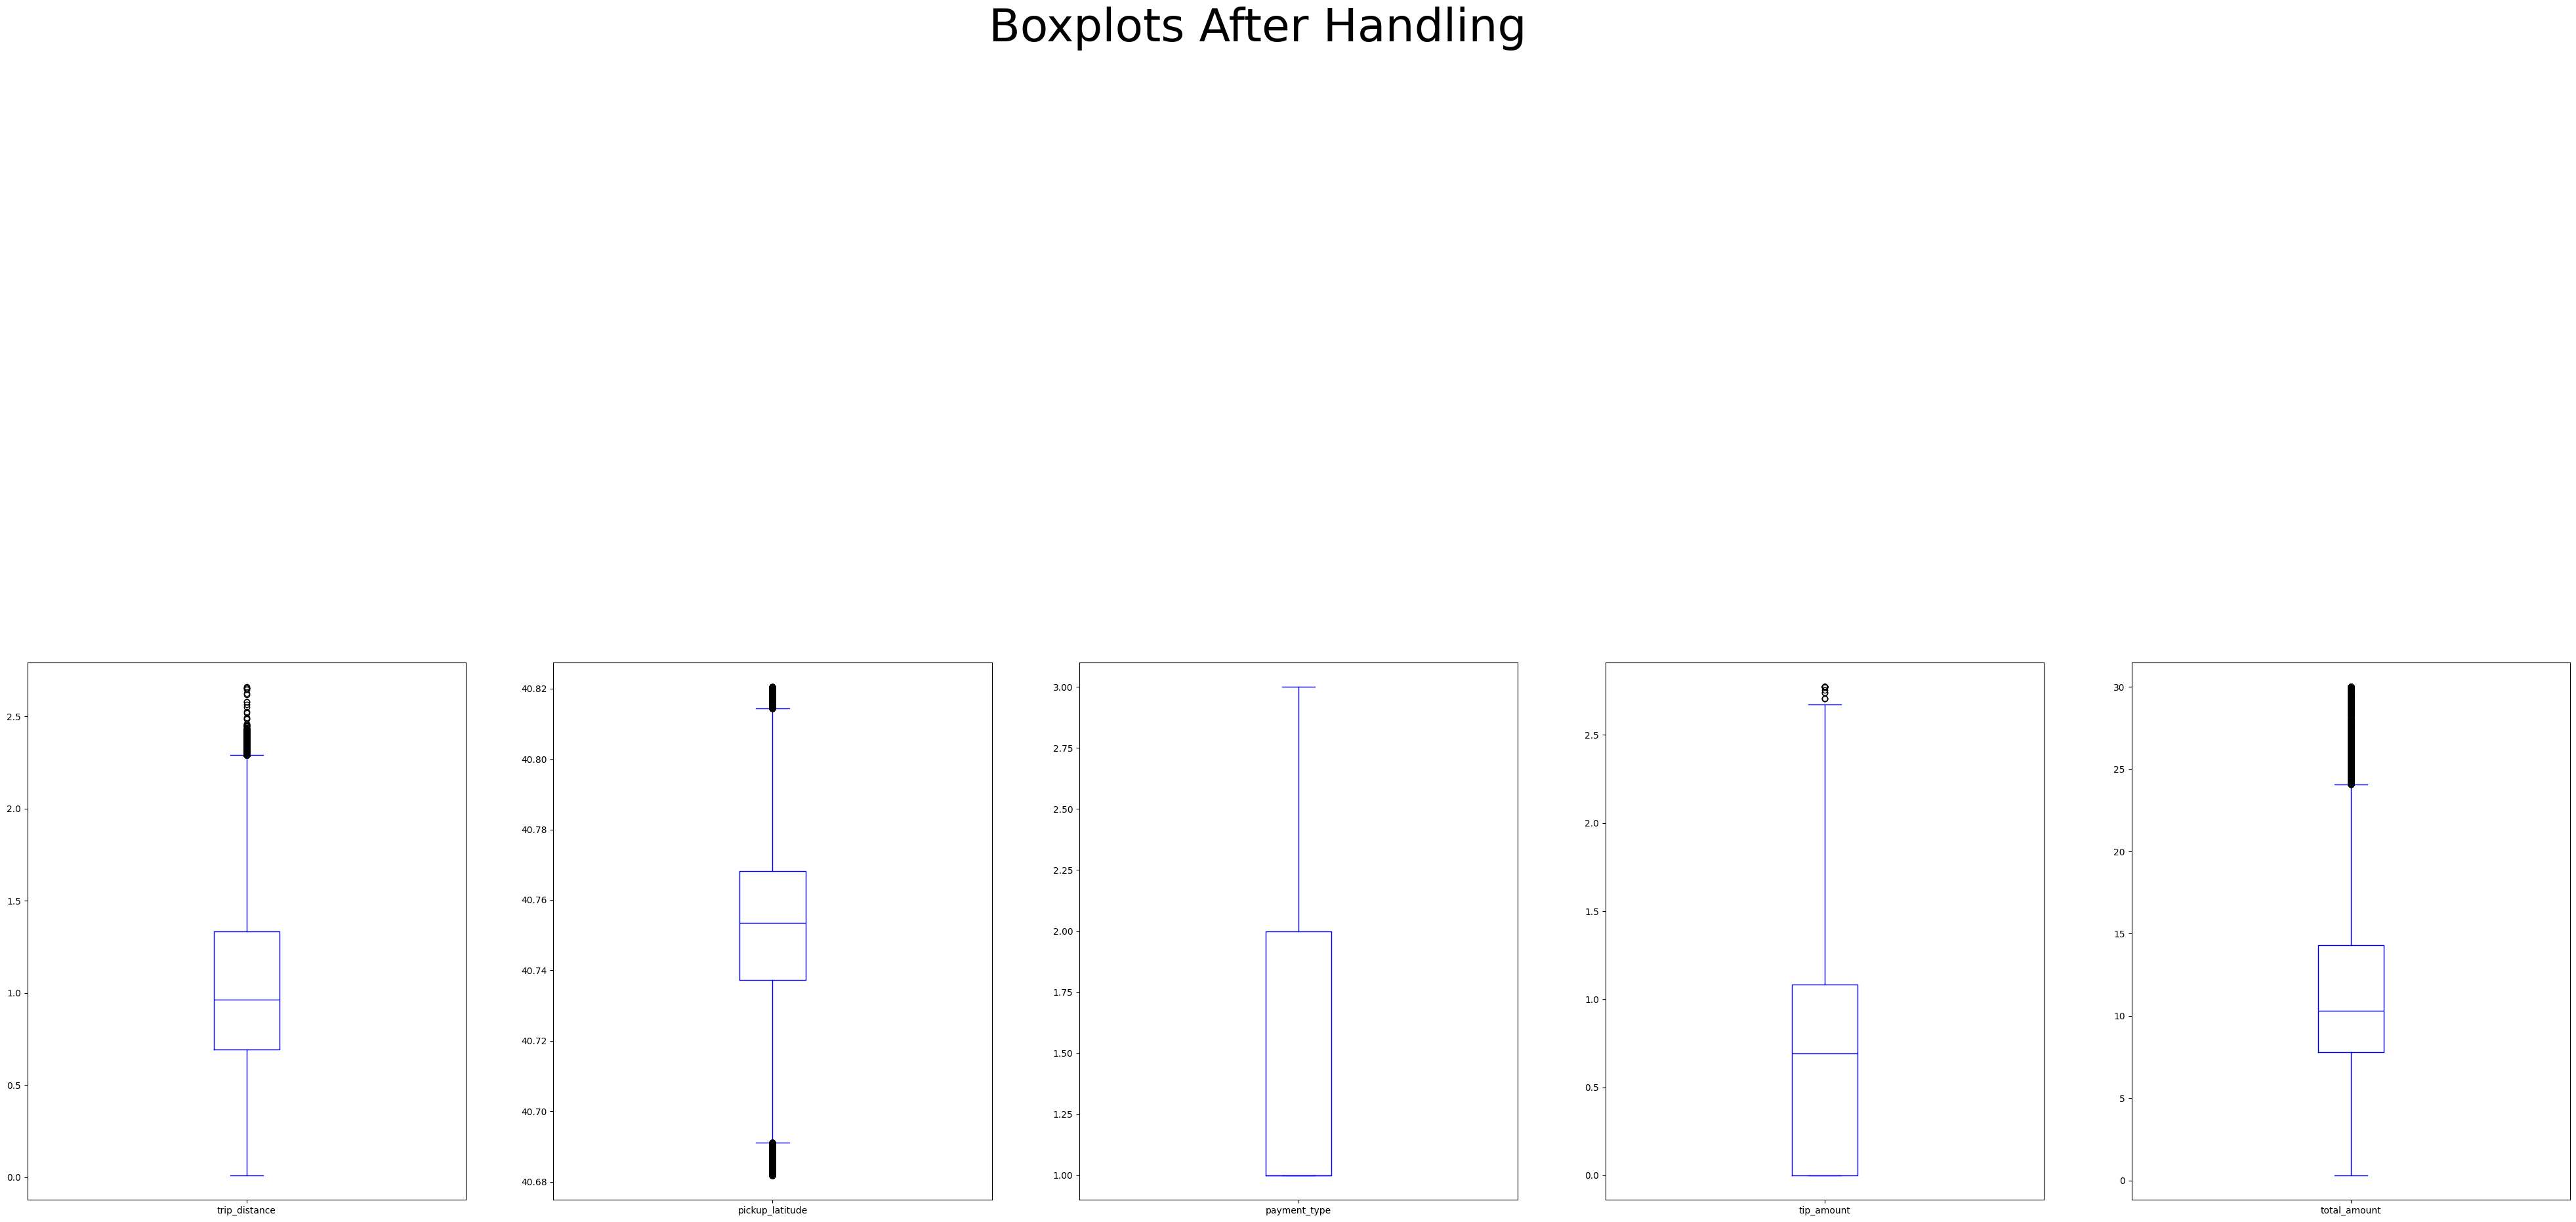

In [311]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='b')
plt.suptitle('Boxplots After Handling',fontsize=50)

plt.show()

# Feature engineering

In [312]:

# Convert datetime columns

df['tpep_pickup_datetime'] = pd.to_datetime(
    df['tpep_pickup_datetime'],
    dayfirst=True  # tells pandas as the day comes first
)

df['tpep_dropoff_datetime'] = pd.to_datetime(
    df['tpep_dropoff_datetime'],
    dayfirst=True
)


df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract time features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday

df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

# Trip duration in minutes
df['trip_duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60
df = df[df['trip_duration_min'] > 0]

In [313]:
df.drop(columns=[
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime'
], inplace=True)


# Encoding

In [314]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].map({'N':0,'Y':1})
df['store_and_fwd_flag'].unique()

array([0, 1])

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906201 entries, 5 to 1048574
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_distance       906201 non-null  float64
 1   pickup_latitude     906201 non-null  float64
 2   store_and_fwd_flag  906201 non-null  int64  
 3   payment_type        906201 non-null  int64  
 4   tip_amount          906201 non-null  float64
 5   total_amount        906201 non-null  float64
 6   pickup_hour         906201 non-null  int32  
 7   pickup_day          906201 non-null  int32  
 8   pickup_month        906201 non-null  int32  
 9   pickup_weekday      906201 non-null  int32  
 10  dropoff_hour        906201 non-null  int32  
 11  trip_duration_min   906201 non-null  float64
dtypes: float64(5), int32(5), int64(2)
memory usage: 72.6 MB


# Feature selection

In [316]:

features = [
    'trip_distance',
    'trip_duration_min',
    'pickup_hour',
    'pickup_day',
    'pickup_month',
    'pickup_weekday',
    'dropoff_hour',
    'pickup_latitude'
]

target = 'total_amount'

X = df[features]
y = df[target]


We removed:tip_amount,payment_type,store_and_fwd_flag. because These features are known after the trip or are part of the fare itself.
Including them causes data leakage,

In [317]:
# X = df.drop('total_amount', axis=1)
# y = df['total_amount']

# Train-Test Split


In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Feature scaling was applied to normalize numerical features and improve model convergence, especially for distance-based algorithms.

# Model Training

In [320]:
models= {
    "Linear_Regression":LinearRegression(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "GradientBoosting_Regressor":GradientBoostingRegressor(),
    "DecisionTree_Regressor":DecisionTreeRegressor(),

}


In [321]:
# # Dictionary to store  results
# results = {'Model':[],'MSE':[],'MAE':[],'R2':[]}

# #Loop through the models,train them and calculate the metrics
# for model_name,model in models.items():
#     # Train the model
#     model.fit(X_train,y_train)
    
#     # Make predictions
#     y_pred = model.predict(X_test)
    
#     # calculate metrics
#     mse =mean_squared_error(y_test,y_pred)
#     mae =mean_absolute_error(y_test,y_pred)
#     r2=r2_score(y_test,y_pred)
    
#     # store results in the dictionary
#     results['Model'].append(model_name)
#     results['MSE'].append(mse)
#     results['MAE'].append(mae)
#     results['R2'].append(r2)
    
# # convert results to a dataframe
# results_df = pd.DataFrame(results)
# # sort by MSE
# results_df= results_df.sort_values(by='MSE',ascending=True)
    
# # Display the sorted Dataframe with Background gradient
# results_df.style.background_gradient('Blues')


# Model Evaluation

In [322]:
final_model= RandomForestRegressor(n_estimators=200,
                                   max_depth=15,
                                   min_samples_split=10,
                                   min_samples_leaf=5,
                                   random_state=42)

final_model.fit(X_train, y_train)

# Prediction
y_pred = final_model.predict(X_test)

In [323]:

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:",r2_score(y_test,y_pred))



RMSE: 1.3316318806279648
MAE: 1.048271845787041
R2: 0.9394520074236203


## Final Report 

Based on the analysis of the `NYC Yellow Taxi Trip` dataset for predicting the `Total Fare Amount`, the Random Forest Regressor model demonstrated the best performance among all the tested machine learning models.

✔ Trip distance and trip duration are the most influential factors in fare prediction

✔ Longer trips and higher distances result in significantly higher fares

✔ Passenger count has minimal impact on the total fare amount

✔ Datetime-based features (pickup hour and trip duration) improve model accuracy

✔ Random Forest handles non-linearity and outliers better than other models

✔ Proper data preprocessing and outlier removal significantly enhanced performance

In [324]:
import pickle
import gradio as gr

with open('taxi_fare_model.pkl','wb') as file:
    pickle.dump(final_model,file)
    import pickle

pickle.dump(scaler, open("scaler.pkl", "wb"))




In [ ]:
import gradio as gr
import numpy as np
import joblib

model = joblib.load("taxi_fare_model.pkl")

def predict_fare(
    trip_distance,
    trip_duration_min,
    pickup_hour,
    pickup_day,
    pickup_month,
    pickup_weekday,
    dropoff_hour,
    pickup_latitude
):
    try:
        input_data = np.array([[ 
            float(trip_distance),
            float(trip_duration_min),
            int(pickup_hour),
            int(pickup_day),
            int(pickup_month),
            int(pickup_weekday),
            int(dropoff_hour),
            float(pickup_latitude)
        ]])

        prediction = model.predict(input_data)
        return f"Total Predicted Fare: ${prediction[0]:.2f}"

    except Exception as e:
        return f"Error: {e}"

interface = gr.Interface(
    fn=predict_fare,
    inputs=[
        gr.Number(label="Trip Distance (km)"),
        gr.Number(label="Trip Duration (minutes)"),
        gr.Number(label="Pickup Hour (0–23)"),
        gr.Number(label="Pickup Day"),
        gr.Number(label="Pickup Month"),
        gr.Number(label="Pickup Weekday (0=Mon)"),
        gr.Number(label="Dropoff Hour (0–23)"),
        gr.Number(label="Pickup Latitude")
    ],
    outputs=gr.Textbox(label="Predicted Fare"),
    title="🚕 Taxi Fare Prediction App",
    description="Realistic taxi fare prediction using pre-trip features"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


In [326]:
# import gradio as gr
# import numpy as np
# import joblib

# # Load trained model
# model = joblib.load("taxi_fare_model.pkl")   # change name if needed

# def predict_fare(
#     trip_distance,
#     pickup_latitude,
#     store_and_fwd_flag,
#     payment_type,
#     tip_amount,
#     pickup_hour,
#     pickup_day,
#     pickup_month,
#     pickup_weekday,
#     dropoff_hour,
#     trip_duration_min
# ):
#     try:
#         # Input must be 2D and in SAME order as training
#         input_data = np.array([[ 
#             float(trip_distance),
#             float(pickup_latitude),
#             int(store_and_fwd_flag),
#             int(payment_type),
#             float(tip_amount),
#             int(pickup_hour),
#             int(pickup_day),
#             int(pickup_month),
#             int(pickup_weekday),
#             int(dropoff_hour),
#             float(trip_duration_min)
#         ]])

#         prediction = model.predict(input_data)
#         return f"Predicted Total Fare Amount: ${prediction[0]:.2f}"

#     except Exception as e:
#         return f"Error: {e}"

# # Gradio UI
# interface = gr.Interface(
#     fn=predict_fare,
#     inputs=[
#         gr.Number(label="Trip Distance (miles)"),
#         gr.Number(label="Pickup Latitude"),
#         gr.Radio([0, 1], label="Store and Forward Flag (0=No, 1=Yes)"),
#         gr.Dropdown([1, 2, 3, 4], label="Payment Type"),
#         gr.Number(label="Tip Amount"),
#         gr.Number(label="Pickup Hour (0-23)"),
#         gr.Number(label="Pickup Day"),
#         gr.Number(label="Pickup Month"),
#         gr.Number(label="Pickup Weekday (0=Mon)"),
#         gr.Number(label="Dropoff Hour (0-23)"),
#         gr.Number(label="Trip Duration (minutes)")
#     ],
#     outputs=gr.Textbox(label="Predicted Fare"),
#     title="🚕 Taxi Fare Prediction App",
#     description="Predict taxi fare using a trained Machine Learning model"
# )

# interface.launch()


In [327]:
# clean_features=[
#  'trip_distance',
#  'pickup_latitude',
#  'pickup_hour',
#  'pickup_day',
#  'pickup_month',
#  'pickup_weekday',
#  'dropoff_hour',
#  'trip_duration_min'
# ]


In [328]:
# X = df[clean_features]
# y = df['total_amount']


In [329]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )


In [330]:
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=15,
#     min_samples_split=10,
#     min_samples_leaf=5,
#     random_state=42
# )


In [331]:
# rf.fit(X_train, y_train)
# final_pred=rf.predict(X_test)

In [332]:
# print("R2:",r2_score(y_test,final_pred))
# print("MAE:", mean_absolute_error(y_test, final_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
